<a href="https://colab.research.google.com/github/dkrsek/401-0614-00L-Probability-and-Statistics/blob/main/Empirical_CDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empirical CDF for the Normal Distribution

In this script, we will compute the empirical CDF based on generated data from normal distribution and compare it with the theoretical CDF

(Note: CDF is a common abbreviation for distribution function (CDF=cumulative distribution function)



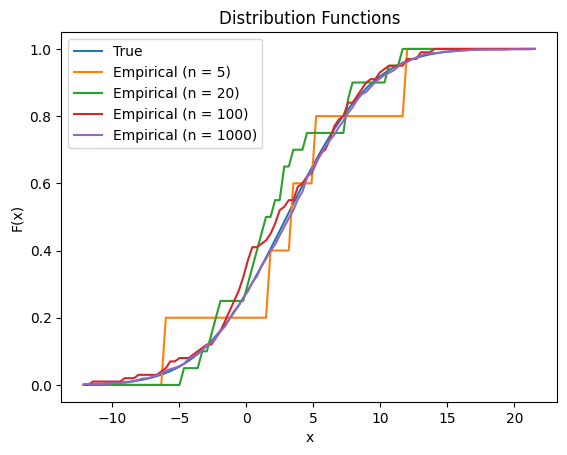

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(3)

mu = 3 #expectation
sigma = 5 #standard deviation

# Function that computes the empirical CDF from a given sample
def empirical_f(t_v, val):
    y_vals = np.zeros(len(t_v))
    for x in val:
        for index, t in enumerate(t_v):
            if x <= t:
                y_vals[index] += 1
    return y_vals / len(val) #normalize by the size of the sample

# Sample from Normal distribution. We consider four sizes of the sample
samples = {}
for n in [5, 20, 100, 1000]:
    samples[n] = np.random.normal(mu, sigma, n)

all_values = np.concatenate(list(samples.values()))
min_val = np.min(all_values)
max_val = np.max(all_values)
t_vals = np.linspace(min_val, max_val, 100)

# Plot the true CDF
plt.plot(t_vals, norm.cdf(t_vals, mu, sigma), label='True')

#Plot the empirical ones
for n in samples:
    plt.plot(t_vals, empirical_f(t_vals, samples[n]), label=f'Empirical (n = {n})')


plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Distribution Functions')
#plt.grid(True)
plt.legend()
plt.show()




We can clearly see that as *n* increases, the empirical CDF gets closer and closer to the theoretical one. We can also compare the (empirical) histograms with the theoretical density:

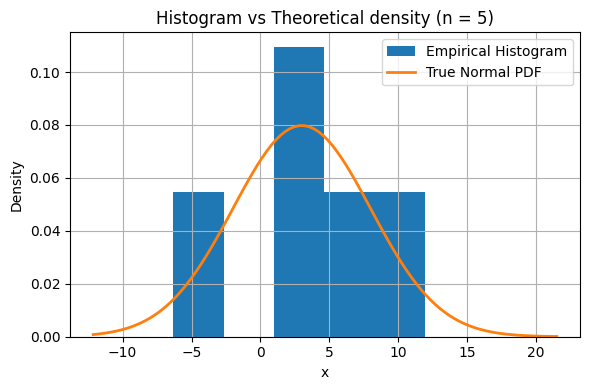

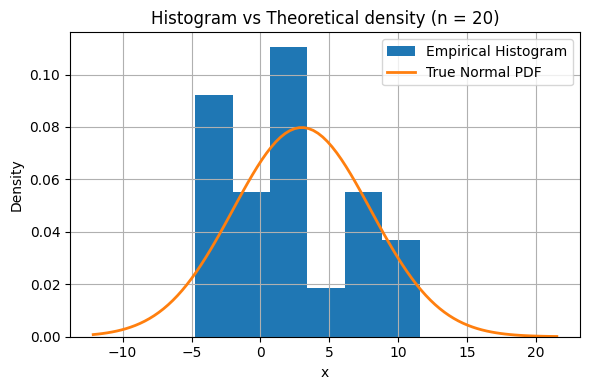

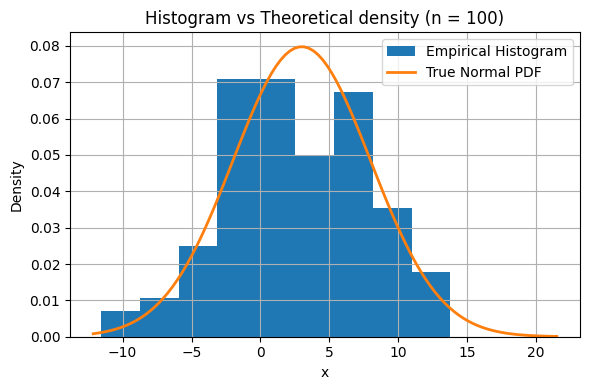

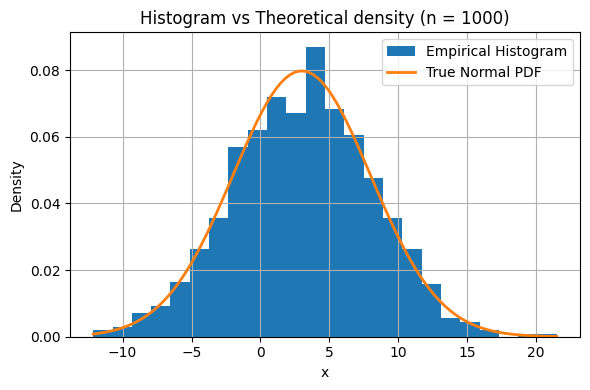

In [79]:
pdf_vals = norm.pdf(t_vals, mu, sigma) # PDF is a commonly used abbreviation for the density (pdf=probability density function)

# Plot histograms with true density
for n in samples:
    plt.figure(figsize=(6, 4))

    # Plot histogram
    plt.hist(samples[n], bins='auto', density=True, label='Empirical Histogram') # bins='auto' selects an optimal bin size using some heuristic
                                                                                 # Plotting each point individually would give a messy graph and wouldn't tell us much about the distribution
                                                                                 # density=True normalizes the mass to 1, so that it is a density
    # Plot true normal density
    plt.plot(t_vals, pdf_vals, label='True Normal PDF', linewidth=2)

    plt.title(f'Histogram vs Theoretical density (n = {n})')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
